<a href="https://www.kaggle.com/code/gargivipat/exploring-data?scriptVersionId=117474030" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-loan-approval/loan_sanction_test.csv
/kaggle/input/home-loan-approval/loan_sanction_train.csv


## **Loading Data**

In [2]:
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
train_df = pd.read_csv('/kaggle/input/home-loan-approval/loan_sanction_train.csv')
test_df = pd.read_csv('/kaggle/input/home-loan-approval/loan_sanction_test.csv')

In [3]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## **Taking a look at the data**

In [4]:
print(train_df.shape, test_df.shape)

(614, 13) (367, 12)


In [5]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**As seen in the above code cell, there are many null values. So, now lets handle these null values.**
1. **Gender column** : Since there are 14 null values, these rows can just be removed from the dataset as the training dataset is already very large. Also here we cannot assume ones gender in order to fill that space hence, we just need to delete these rows.

2. **Dependents** : Since it is a categorical data with 0 for no dependents, thus here one assumption can be made that if the value is null then there are no dependents and hence, the space can be filled with 0.

3. **Married** : Here also as the number of null values are very low we can just eradicate these rows and assume that the dataset would be fine.

4. **Self-Employed** : Again, it is a categorical data with yes and no as categories, instead of deleting them altogether an assumption can be made that if null is there then that means the applicant isn't self empoyed, thus fill 'no'.

5. **LoanAmount** :  In this columns, there ar only numerical values, thus here if loan amount isn't provided a median of all the values can be filled in the null positions.

6. **LoanAmountTerm** : Here as it is again a numerical data, we can fill this with the mean of all the values.

7. **Credit_History** : Again repeat the procedure done in the self-employed column.

In [7]:
#gender column
train_df = train_df[train_df['Gender'].notna()]

In [8]:
train_df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#dependents column
train_df['Dependents'] = train_df['Dependents'].fillna('0')
train_df.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#Married column
train_df = train_df[train_df['Married'].notna()]
train_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
#Self_employed column
train_df['Self_Employed'] = train_df['Self_Employed'].fillna('No')
train_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#Loan amount column
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].median())
train_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
#Loan amount term column
train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].min())
train_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
#credit history column
train_df['Credit_History'] = train_df['Credit_History'].fillna(0)

In [15]:
train_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
train_df.shape

(598, 13)

**Now that all the null values are succesfully removed, lets have a look at the columns individually.**

In [17]:
train_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [18]:
train_df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
train_df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [20]:
train_df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [21]:
train_df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
train_df['Credit_History'].unique()

array([1., 0.])

In [23]:
train_df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [24]:
train_df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

**Here the dependents column,firstly instead of having int values has string values and also there is a category 3+ which can be removed and inplace 3 can be used.**

In [25]:
def chng_three(d):
    if d == '3+':
        d = '3'
    return int(d)
train_df['Dependents'] = train_df['Dependents'].apply(chng_three)

In [26]:
train_df['Dependents'].unique()

array([0, 1, 2, 3])

**Credit History column values can be changed to int.**

In [27]:
train_df['Credit_History'] = train_df['Credit_History'].astype(int)
train_df['Credit_History'].dtype

dtype('int64')

In [28]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,127.0,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y


## **Exploratory Data Analysis**

### **Univariate Analysis**
1. First, let's have a look at CATEGORICAL data.
2. Then we can move on to NUMERICAL data.

#### **Categorical Data**

<AxesSubplot:xlabel='Gender', ylabel='count'>

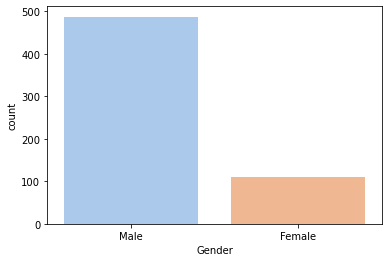

In [29]:
#Gender column

import seaborn as sns
sns.countplot(train_df['Gender'],palette=sns.color_palette('pastel'))

> ***Note:*** *Here we see the number of male applicants is way more than number of female applicants*

<AxesSubplot:ylabel='Married'>

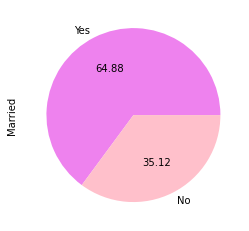

In [30]:
#Married column
train_df['Married'].value_counts().plot(kind='pie',autopct='%.2f',colors=['violet','pink'])

***Note***: *Here we see the number of most of the applicants are married and that most of the applicants are male*

<AxesSubplot:ylabel='Dependents'>

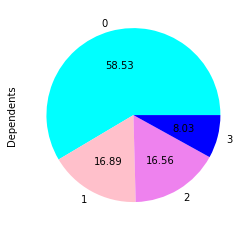

In [31]:
#Dependents column
train_df['Dependents'].value_counts().plot(kind='pie',autopct='%.2f',colors=['cyan','pink','violet','blue'])

<AxesSubplot:xlabel='Education', ylabel='count'>

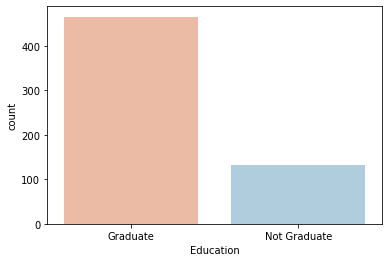

In [32]:
#Education column
sns.countplot(train_df['Education'],palette='RdBu')

<AxesSubplot:ylabel='Self_Employed'>

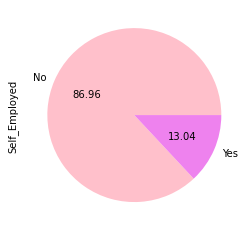

In [33]:
#Self employed column
train_df['Self_Employed'].value_counts().plot(kind = 'pie',autopct = '%.2f',colors=['pink','violet'])

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

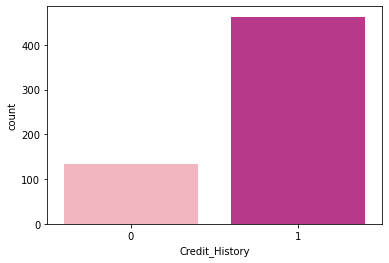

In [34]:
#Credit history column
sns.countplot(train_df['Credit_History'],palette='RdPu')

<AxesSubplot:ylabel='Property_Area'>

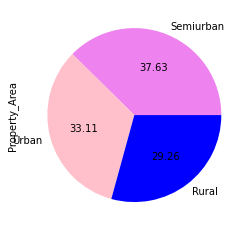

In [35]:
#Property area column
train_df['Property_Area'].value_counts().plot(kind = 'pie',autopct = '%.2f',colors=['violet','pink','blue'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

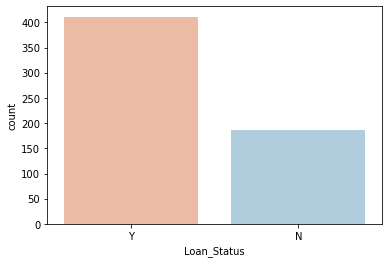

In [36]:
#Loan status column
sns.countplot(train_df['Loan_Status'],palette='RdBu')

***Now looking at all the categorical data in relation with Loan status column***

In [37]:
cols = train_df.columns

num_cols = train_df._get_numeric_data().columns

category = list(set(cols) - set(num_cols))
i=category.index('Loan_ID')
category.pop(i)
category.pop(1)
category.extend(['Dependents','Credit_History','Loan_Amount_Term'])
print(category)

['Property_Area', 'Loan_Status', 'Married', 'Gender', 'Self_Employed', 'Dependents', 'Credit_History', 'Loan_Amount_Term']


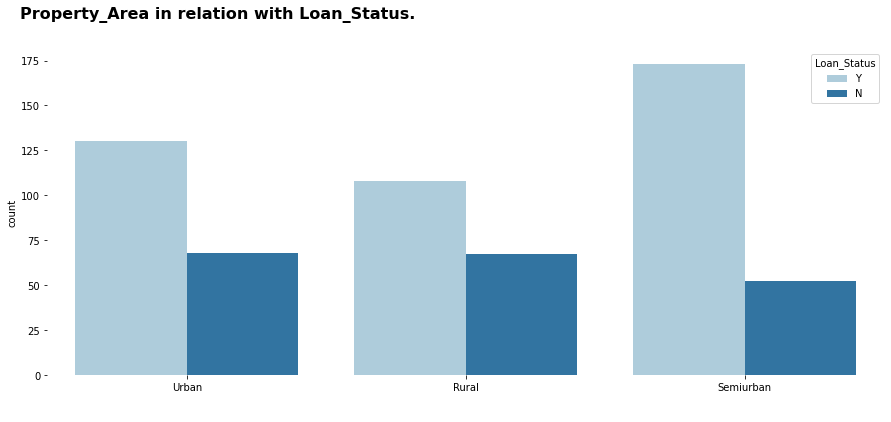

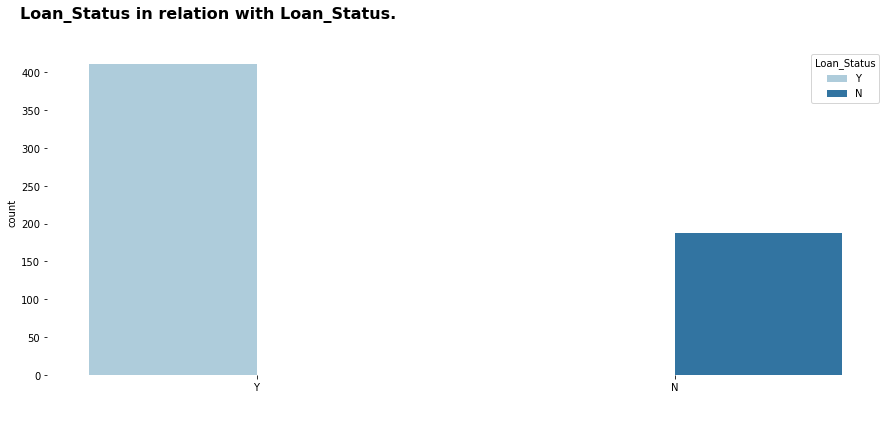

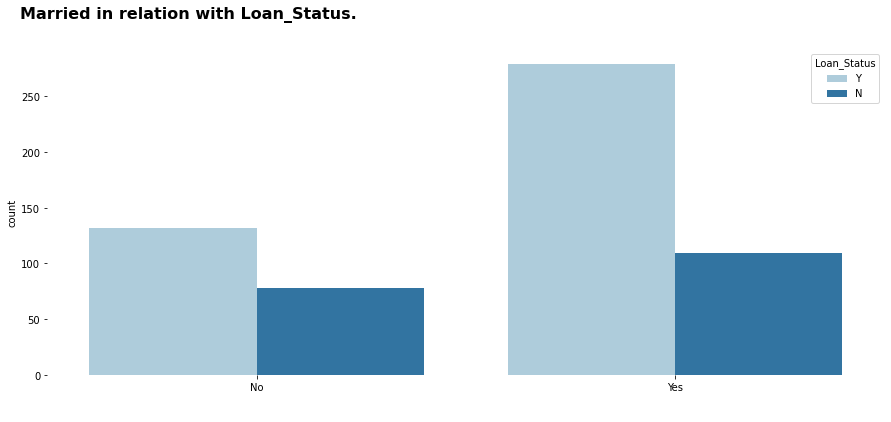

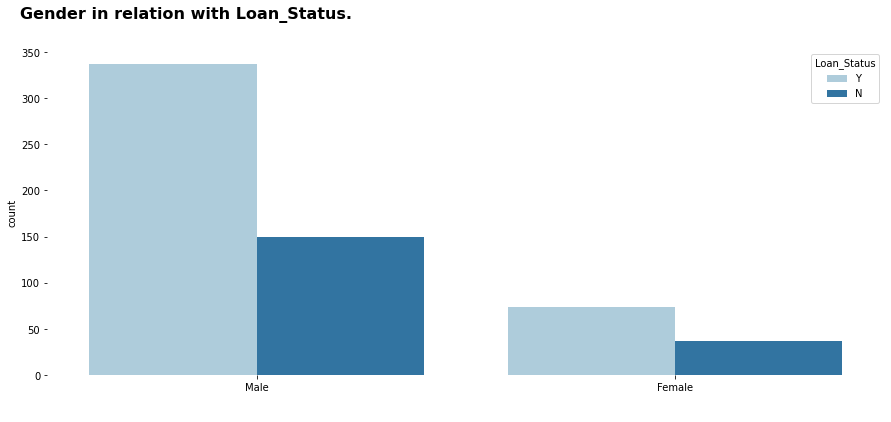

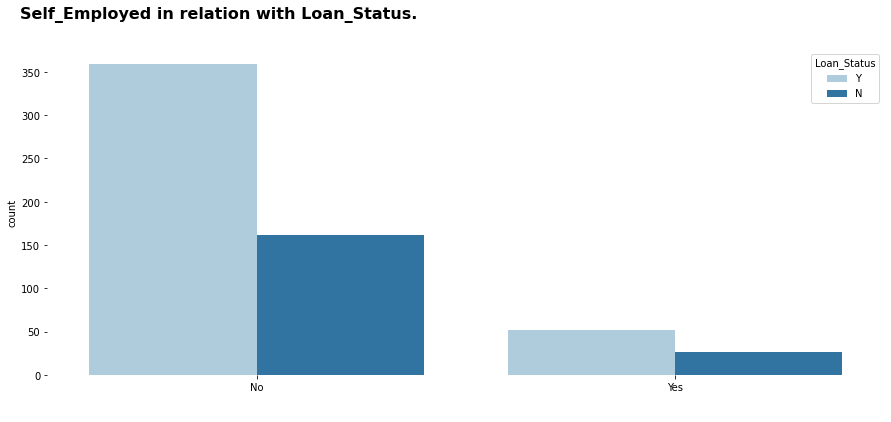

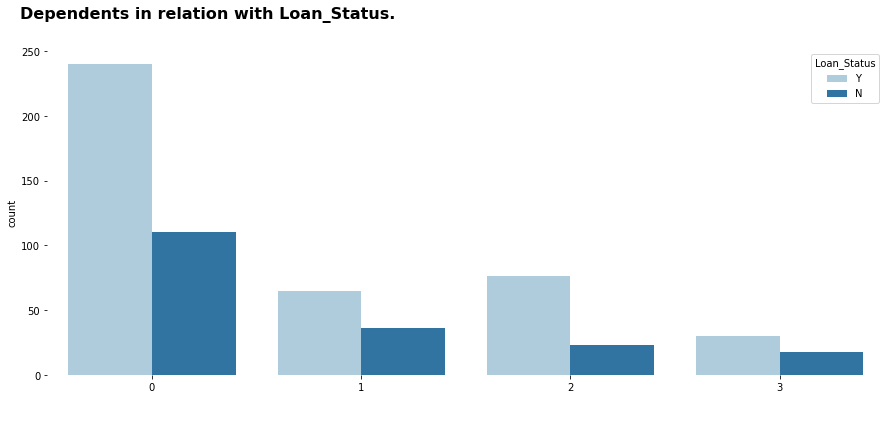

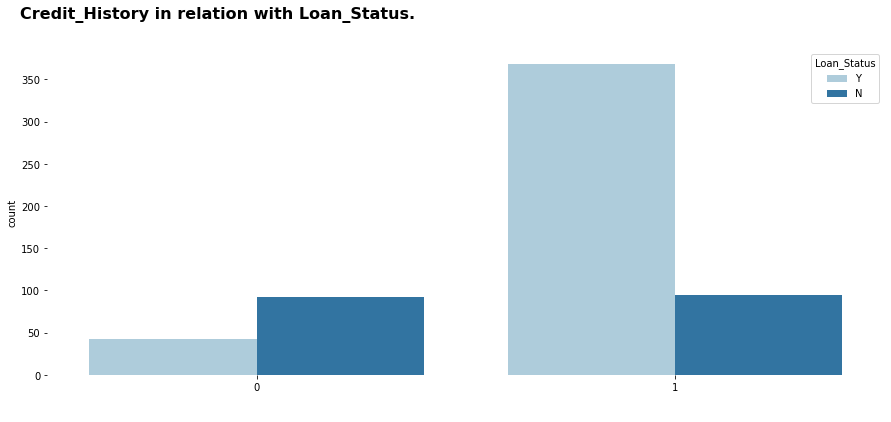

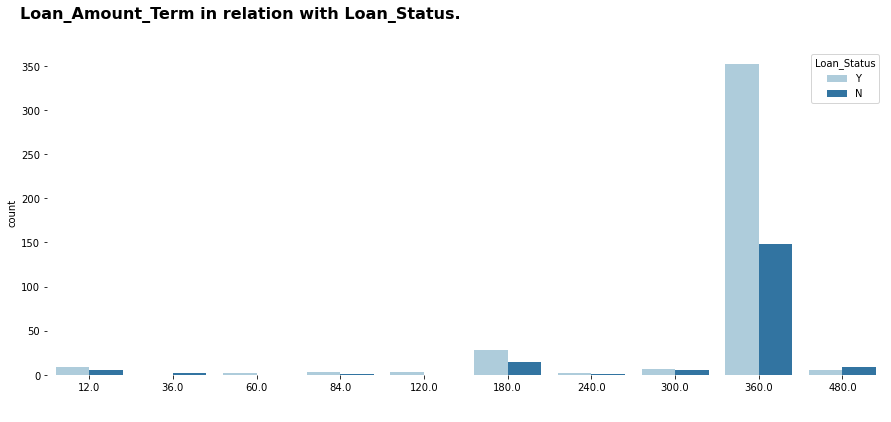

In [38]:
import matplotlib.pyplot as plt
for c in category:
    fig,ax = plt.subplots(1,1,figsize=(15,6))
    sns.countplot(train_df[c],hue = train_df['Loan_Status'],palette='Paired')
    fig.text(0.1,0.95,f"{c} in relation with Loan_Status.",fontsize=16,fontweight='bold',fontfamily='sans serif')
    plt.xlabel(" ",fontsize=20)
    plt.ylabel=("")
    plt.box(False)

*Except for credit history majority of applicants in a category have a positive loan status, which is expected if credit history is low then loan status shouldn't be yes.*

#### **Numerical Data**

In [39]:
num = list(num_cols)
num.pop()
print(num)
num.pop(0)
num.pop()
print(num)

['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


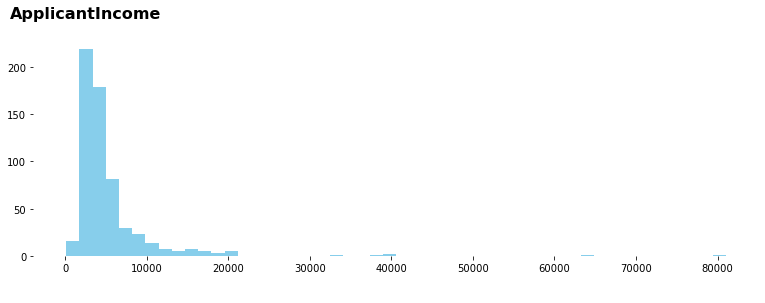

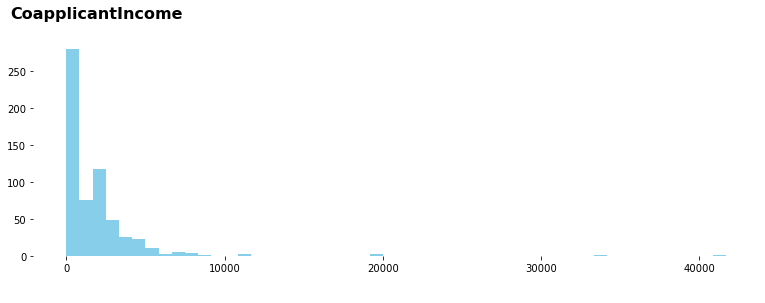

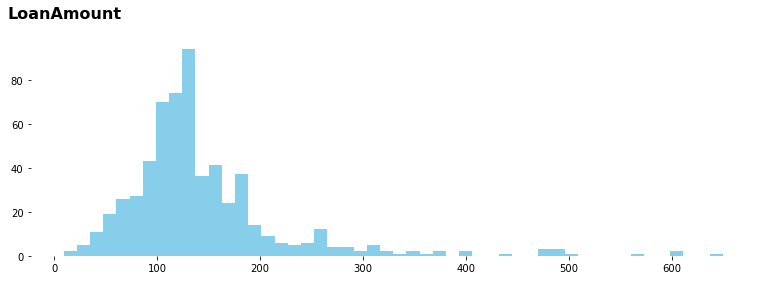

In [40]:
for n in num:
    fig,ax = plt.subplots(1,1,figsize=(13,4))
    plt.hist(train_df[n],color='skyblue',bins=50)
    fig.text(0.1,0.95,f"{n}",fontsize=16,fontweight='bold',fontfamily='sans serif')
    plt.xlabel(" ",fontsize=20)
    plt.ylabel=("")
    plt.box(False)

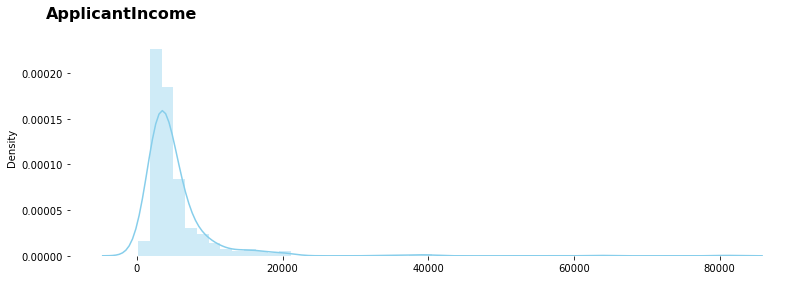

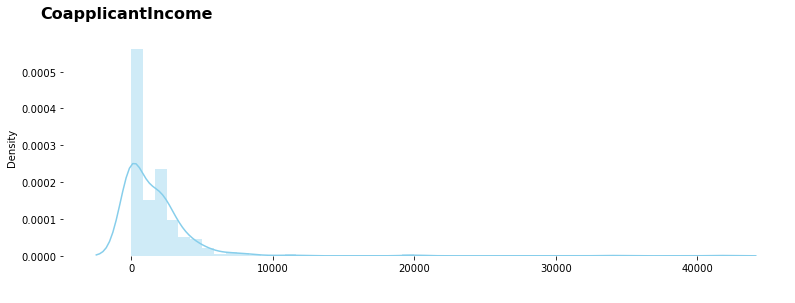

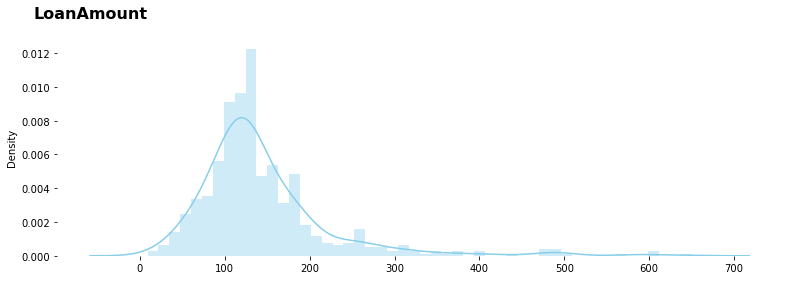

In [41]:
for n in num:
    fig,ax = plt.subplots(1,1,figsize=(13,4))
    sns.distplot(train_df[n],color='skyblue',bins=50)
    fig.text(0.1,0.95,f"{n}",fontsize=16,fontweight='bold',fontfamily='sans serif')
    plt.xlabel(" ",fontsize=20)
    plt.ylabel=("")
    plt.box(False)

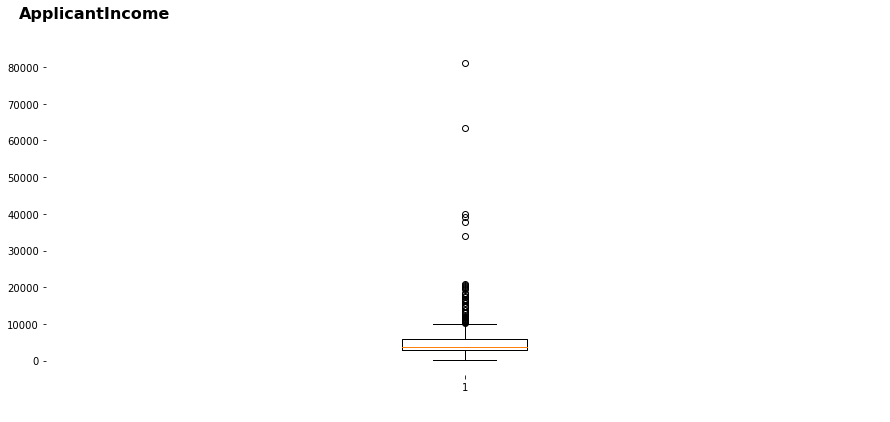

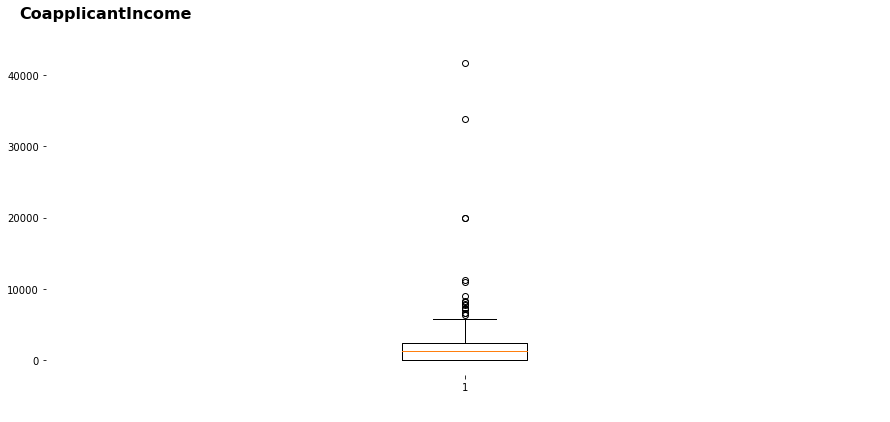

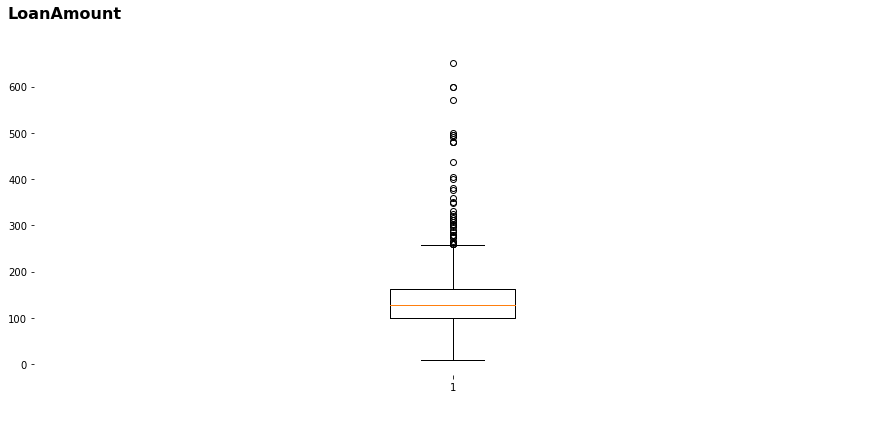

In [42]:
for n in num:
    fig,ax = plt.subplots(1,1,figsize=(15,6))
    plt.boxplot(train_df[n])
    fig.text(0.1,0.95,f"{n}",fontsize=16,fontweight='bold',fontfamily='sans serif')
    plt.xlabel(" ",fontsize=20)
    plt.ylabel=("")
    plt.box(False)

**As indicated by the box plot there are many outliers that can deteriorate the model. Thus they need to be handled.**

In [43]:
#to be continued